### 1.Perform Exploratory data analysis. (20)
○ What can you conclude from methods of central tendency and deviation of
the variables?
○ Are there any correlated variables?
○ Interpret the skewness of the variables.

In [80]:
# Import data

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data_sheet = pd.read_csv('cancer.csv')

data_sheet

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


#### Show summary statistics for the data

In [2]:

data_sheet.describe()

# How the values are distributed using the methods of central tendency

# We can conclude that the mean values for all the variables are not far off from each other 
# So there is no deviation of the variable and all the variables will have a decent impact on the overall model. 
# Age and Year will have a greater impact on the model

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#### Checking for outliers

<IPython.core.display.Javascript object>


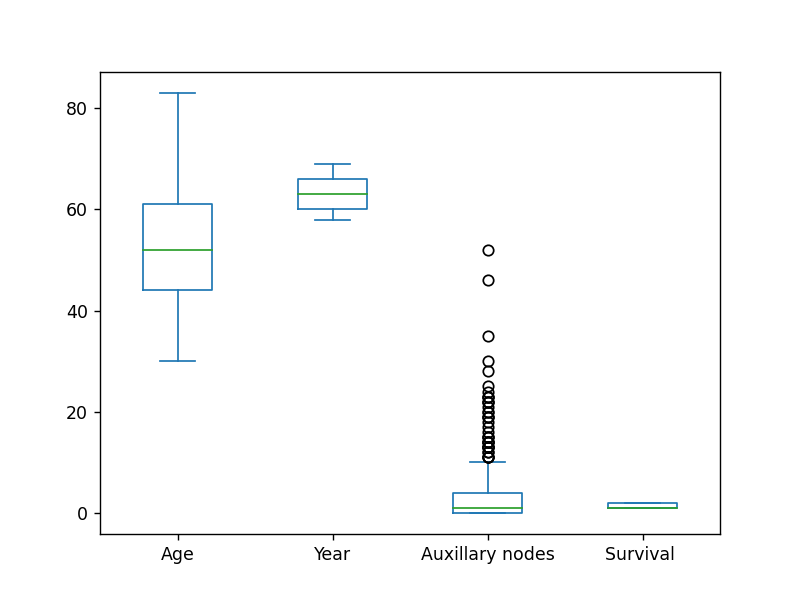

<AxesSubplot:>

In [68]:

%matplotlib notebook

data_sheet.plot.box()

#### Removing the Ouliers in Auxillary nodes


<IPython.core.display.Javascript object>


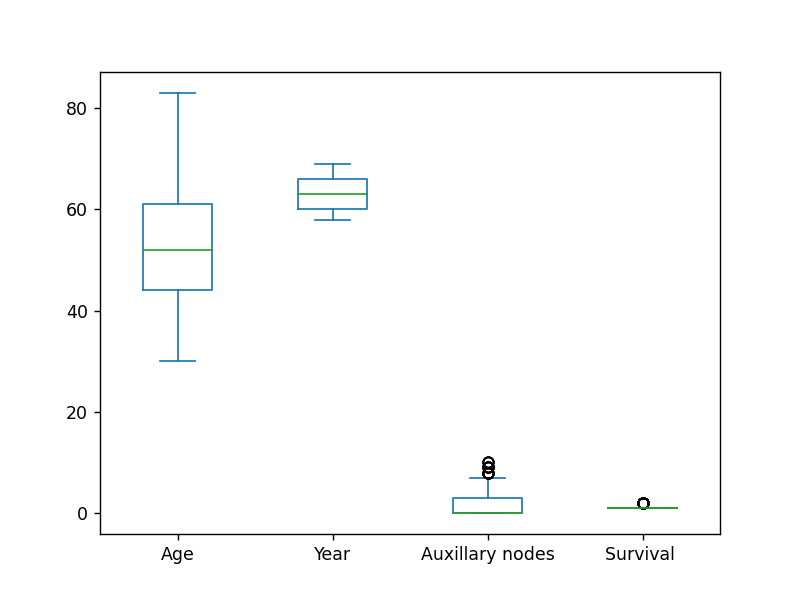

<AxesSubplot:>

In [4]:

# Max = 75% + 1.5*(75% -25%)
max_value = 4 + 1.5*(4 - 0)

new_data = data_sheet[data_sheet['Auxillary nodes'] <= max_value]
new_data.plot.box() 

#### Check for correlation 

In [5]:

corr = new_data.corr()

corr

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092426,-0.108307,0.059688
Year,0.092426,1.000000,-0.006921,0.031328
Auxillary nodes,-0.108307,-0.006921,1.000000,0.236411
Survival,0.059688,0.031328,0.236411,1.000000


<AxesSubplot:>

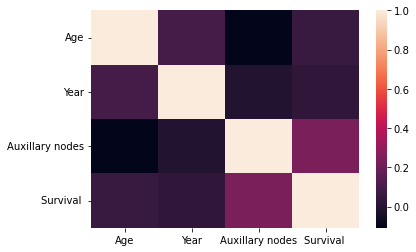

In [6]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr)

# We conclude that there are no correlated variables

#### Checking for skewness and interpreting

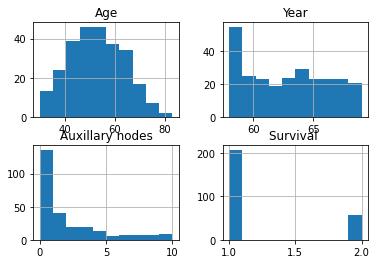

In [7]:

new_data.hist()

# Age is normally distributted
# Year is moderately right skewed
# Auxillary nodes is highly right skewed
# Survival is not normally distributed

new_data.to_csv('new_data.csv')

#### Removing Skewness

C:\Users\fumzy\AppData\Local\Temp/ipykernel_11404/2395951626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Year'] = np.log(new_data['Year'])


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

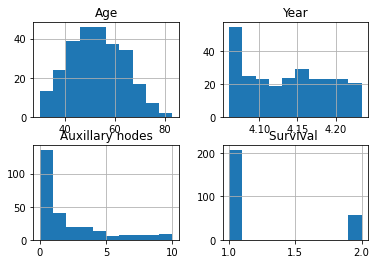

In [8]:

new_data['Year'] = np.log(new_data['Year'])
new_data.hist()

C:\Users\fumzy\AppData\Local\Temp/ipykernel_11404/1639459736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Auxillary nodes'] = new_data['Auxillary nodes']**0.5


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

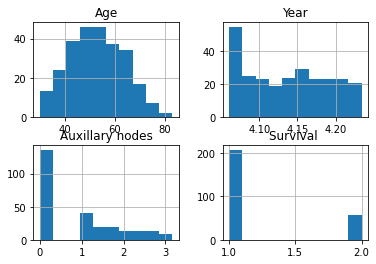

In [9]:
new_data['Auxillary nodes'] = new_data['Auxillary nodes']**0.5
new_data.hist()

### 2. Develop Supervised learning models. (50)
○ Logistic Regression
○ Random Forest
○ Support Vector Machine
○ Neural Network

In [10]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt

# Scikit learn - machine learning algorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, accuracy_score

#### Doing Standardization or Normalization

In [12]:

scaler = MinMaxScaler()
scaler.fit(new_data)
scaled = scaler.fit_transform(new_data)
scaled_data = pd.DataFrame(scaled, columns = new_data.columns)

scaled_data

,Age,Year,Auxillary nodes,Survival
0,0.000000,0.384026,0.547723,0.0
1,0.000000,0.656121,0.000000,0.0
2,0.018868,0.098434,0.447214,0.0
3,0.018868,0.656121,0.632456,0.0
4,0.056604,0.000000,1.000000,0.0
...,...,...,...,...
260,0.849057,0.384026,0.316228,0.0
261,0.867925,0.830627,0.000000,0.0
262,0.886792,0.656121,0.547723,0.0
263,0.905660,0.656121,0.316228,1.0


#### Importing data 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

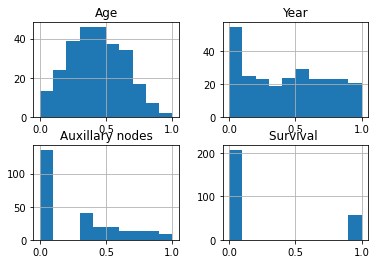

In [14]:

#Creating features and inputs 
x = scaled_data.drop(columns = ["Survival "])

# Create the output
y = scaled_data["Survival "]

# Slitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, train_size = 0.6)

scaled_data.hist()

#### Building Logistic Regression Model


              precision    recall  f1-score   support

         0.0       0.75      0.99      0.85        78
         1.0       0.67      0.07      0.13        28

    accuracy                           0.75       106
   macro avg       0.71      0.53      0.49       106
weighted avg       0.73      0.75      0.66       106



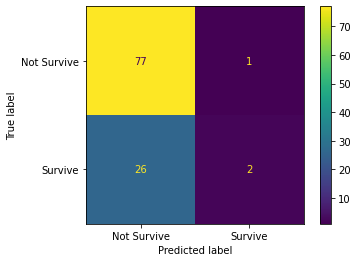

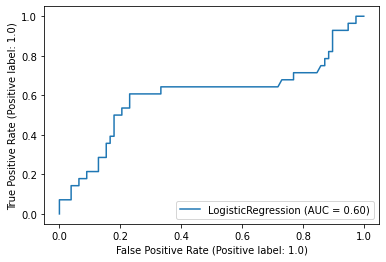

In [37]:

# Defining and training the model
lr_model = LogisticRegression(solver = "liblinear", penalty = "l1", C = 100, random_state = 10).fit(x_train, y_train)

# Evaluating the model 
lr_model.score(x_test, y_test)

# Making predictions
y_pred = lr_model.predict(x_test)

# Creating the labels
labels = ["Not Survive", "Survive"]

# Developing the confusion matrix
cmatrix = confusion_matrix(y_test, y_pred, labels = lr_model.classes_)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cmatrix, display_labels = labels)
disp.plot()

# Print performance metrics 
print(classification_report(y_test, y_pred, labels = lr_model.classes_))

# Plotting ROC curve
plot_roc_curve(lr_model, x_test, y_test) 
plt.show()

#### Building Random Forest Model

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        78
         1.0       1.00      0.04      0.07        28

    accuracy                           0.75       106
   macro avg       0.87      0.52      0.46       106
weighted avg       0.81      0.75      0.65       106



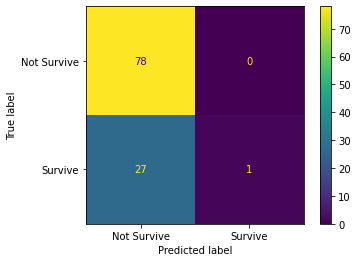

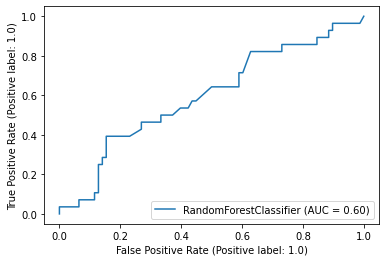

In [32]:

rf_model = RandomForestClassifier(n_estimators = 10, max_depth = 3, max_features = 'sqrt', random_state = 0).fit(x_train, y_train)

# Making predictions
rf_pred = rf_model.predict(x_test)

cmatrix_rf = confusion_matrix(y_test, rf_pred, labels = rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cmatrix_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = rf_model.classes_))

# Plotting ROC curve
plot_roc_curve(rf_model, x_test, y_test) 
plt.show()

#### Building Support Vector Machine Model

C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        78
         1.0       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



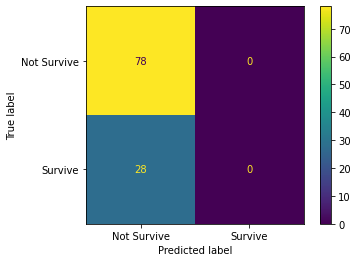

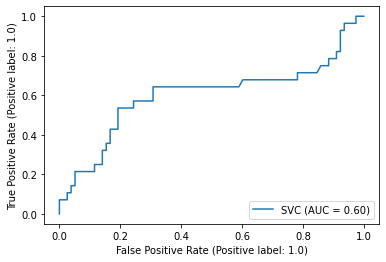

In [67]:

svm_model = SVC(random_state = 1, kernel = "linear", gamma = 1, C = 1,).fit(x_train, y_train)

svm_pred = svm_model.predict(x_test)

cmatrix_svm = confusion_matrix(y_test, svm_pred, labels = smv_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cmatrix_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = svm_model.classes_))

# Plotting ROC curve
plot_roc_curve(svm_model, x_test, y_test) 
plt.show()

#### Building Neutral Network Model

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        78
         1.0       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


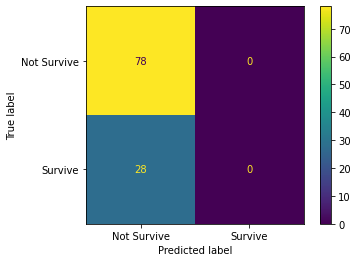

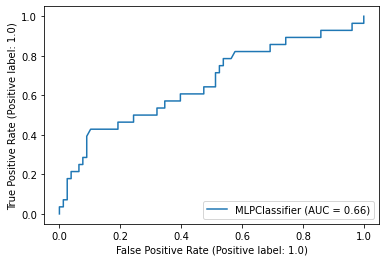

In [20]:

nn_model = MLPClassifier(solver = 'sgd', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "identity", learning_rate_init = 0.01).fit(x_train, y_train)

nn_pred = nn_model.predict(x_test)

cmatrix_nn = confusion_matrix(y_test, nn_pred, labels = nn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cmatrix_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = nn_model.classes_))

# Plotting ROC curve
plot_roc_curve(nn_model, x_test, y_test) 
plt.show()

#### Compare the 4 methods based on the performance metrics and identify the best model for this problem.
Use 10 - fold cross validation.
Use GridSearchCV for searching through hyper parameters.

    

In [62]:
# Implement k-fold cross validation for Logistic Regression Model

# Specify the number of splits - 10
kf = KFold(n_splits=10)

lr_train = []

iteration = 1
for train_indices, test_indices in kf.split(x_train):
    lr_model.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(lr_model.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    lr_train.append(lr_model.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1

Avelr_train = sum(lr_train)/len(lr_train)
print("For Logistic Regression:")
print("Average accuracy training set is :" + str(Avelr_train))
print("Testing accuracy is "+ str(lr_model.score(x_test, y_test)))


Accuracy for iteration 1 is 1.0
Accuracy for iteration 2 is 0.6875
Accuracy for iteration 3 is 0.875
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.75
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.75
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333
For Logistic Regression:
Average accuracy training set is :0.8045833333333332
Testing accuracy is 0.7452830188679245


In [63]:
# Implement k-fold cross validation for Random Forest Model

# Specify the number of splits - 10
kf = KFold(n_splits=10)

rf_train = []

iteration = 1
for train_indices, test_indices in kf.split(x_train):
    rf_model.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(rf_model.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    rf_train.append(rf_model.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1

Averf_train = sum(rf_train)/len(rf_train)
print("For Random Forest:")
print("Average accuracy training set is :" + str(Averf_train))
print("Testing accuracy is "+ str(rf_model.score(x_test, y_test)))

Accuracy for iteration 1 is 1.0
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.75
Accuracy for iteration 7 is 0.75
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333
For Random Forest:
Average accuracy training set is :0.8045833333333332
Testing accuracy is 0.7358490566037735


In [64]:
# Implement k-fold cross validation for Support Vector Machine Model

# Specify the number of splits - 10
kf = KFold(n_splits=10)

svm_train = []

iteration = 1
for train_indices, test_indices in kf.split(x_train):
    svm_model.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(svm_model.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    svm_train.append(svm_model.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1

Avesvm_train = sum(svm_train)/len(svm_train)
print("Support Vector Machine:")
print("Average accuracy training set is :" + str(Avesvm_train))
print("Testing accuracy is "+ str(svm_model.score(x_test, y_test)))

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333
Support Vector Machine:
Average accuracy training set is :0.8108333333333333
Testing accuracy is 0.7358490566037735


In [66]:
# Implement k-fold cross validation for Neutral Network Model

# Specify the number of splits - 10
kf = KFold(n_splits=10)

nn_train = []

iteration = 1
for train_indices, test_indices in kf.split(x_train):
    nn_model.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(nn_model.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    nn_train.append(nn_model.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1

Avesvm_train = sum(nn_train)/len(nn_train)

print("Neutral Network Model:")
print("Average accuracy training set is :" + str(Avesvm_train))
print("Testing accuracy is "+ str(svm_model.score(x_test, y_test)))

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333
Neutral Network Model:
Average accuracy training set is :0.8108333333333333
Testing accuracy is 0.7358490566037735


#### The best model

In [ ]:
# Based the performance metrics the best model for this problem is the Logistic Regression model because 
# its average training accuracy was the most closest to the testing accuracy. 

#### GridSearch

In [28]:
# Implement grid search for parameter tuning for Logistic Regression

parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 'penalty':('l1', 'l2', 'elasticnet', 'none'),
             'C': [100, 10, 1.0, 0.1, 0.01]}

svm_grid = GridSearchCV(lr_model, parameters)
svm_grid.fit(x_train, y_train)
svm_grid.best_params_

C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estim

C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\model_

C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\model_

C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\model_

C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\model_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [35]:
# Implement grid search for parameter tuning for Random Forest

parameters = {'max_features': ('sqrt', 'log2'), 'n_estimators': [10, 100, 1000], 'max_depth':[1, 2, 3, 4, 5]}

svm_grid = GridSearchCV(rf_model, parameters)
svm_grid.fit(x_train, y_train)
svm_grid.best_params_

{'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 10}

In [26]:
# Implement grid search for parameter tuning for Support Vector Machine Model

parameters = {'kernel':('linear', 'rbf',), 'C':[1, 10]}

svm_grid = GridSearchCV(svm_model, parameters)
svm_grid.fit(x_train, y_train)
svm_grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [34]:
# Implement grid search for parameter tuning for Neutral Network Model

parameters = {'solver': ('lbfgs', 'sgd', 'adam'), 'learning_rate': ('constant', 'invscaling', 'adaptive'), 'activation': ('identity', 'logistic', 'tanh', 'relu')}

svm_grid = GridSearchCV(nn_model, parameters)
svm_grid.fit(x_train, y_train)
svm_grid.best_params_

C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = 

C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs f

{'activation': 'identity', 'learning_rate': 'constant', 'solver': 'sgd'}

### 3. Evaluate if the algorithms are overfitting?

In [ ]:
# From the results gotten above 

#For Logistic Regression:
#Average accuracy training set is :0.8045833333333332
#Testing accuracy is 0.7452830188679245
# This shows that the accuracies have different values and the model is overfitting for the training data

#For Random Forest:
#Average accuracy training set is :0.8045833333333332
#Testing accuracy is 0.7358490566037735
# This shows that the accuracies have different values and the model is overfitting for the training data

#Support Vector Machine:
#Average accuracy training set is :0.8108333333333333
#Testing accuracy is 0.7358490566037735
# This shows that the accuracies have different values and the model is overfitting for the training data

#Neutral Network Model:
#Average accuracy training set is :0.8108333333333333
#Testing accuracy is 0.7358490566037735
# This shows that the accuracies have different values and the model is overfitting for the training data


### 4. Develop a function which can implement machine learning. (20)

Enter your csv file name: cancer.csv
Enter your algorithm choice (LRC, RFC, SVM, NN): nn


C:\Users\fumzy\AppData\Local\Temp/ipykernel_11404/545764756.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imported_data["Auxillary nodes"] = imported_data["Auxillary nodes"]**(0.5)
C:\Users\fumzy\AppData\Local\Temp/ipykernel_11404/545764756.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imported_data["Year"] = np.log(imported_data["Year"])
C:\Users\fumzy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STO

<IPython.core.display.Javascript object>


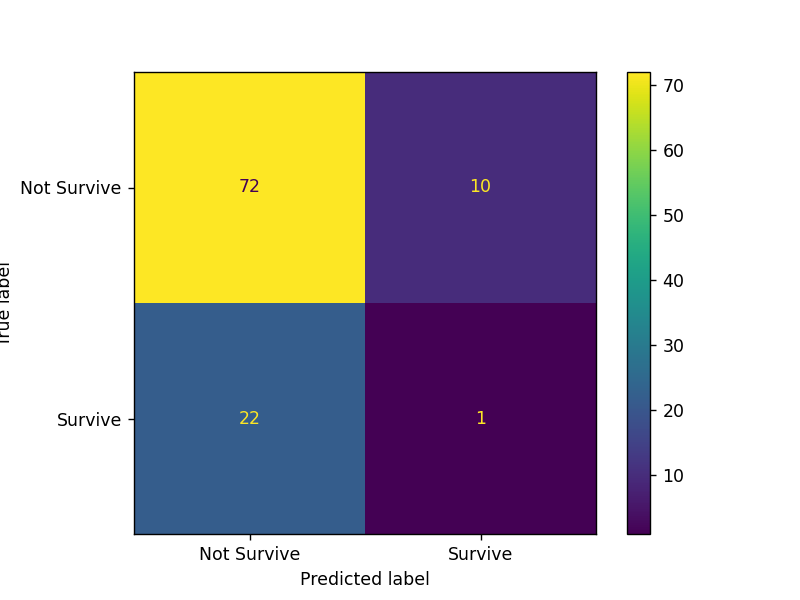

<IPython.core.display.Javascript object>


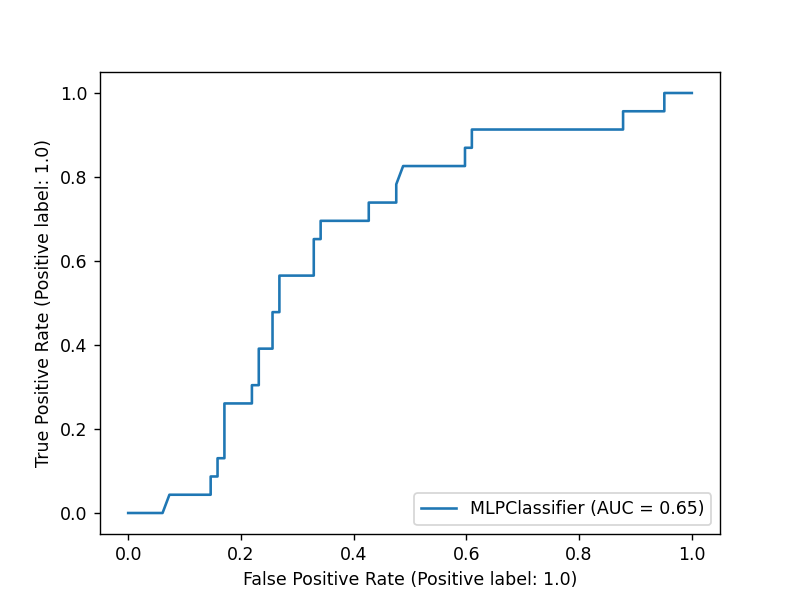

              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82        82
         1.0       0.09      0.04      0.06        23

    accuracy                           0.70       105
   macro avg       0.43      0.46      0.44       105
weighted avg       0.62      0.70      0.65       105



In [81]:
def machine_learning(data, algorithm):
    
    dataML = pd.read_csv(data)
    
    # Remove Outliers 

    maximum = 4 + 1.5*(4-0)
    imported_data = dataML[dataML["Auxillary nodes"] < maximum]
    
    
    imported_data["Auxillary nodes"] = imported_data["Auxillary nodes"]**(0.5)
    imported_data["Year"] = np.log(imported_data["Year"])
    
    # Transformation
    scaler = MinMaxScaler()
    scaler.fit(imported_data)
    scaled =scaler.fit_transform(imported_data)
    scaled_data = pd.DataFrame(scaled, columns = imported_data.columns)
    
    # Create features / inputs
    X = scaled_data.iloc[:, :-1]
    
    # Create the output/ Survival
    y = scaled_data.iloc[:, -1]
    
    # splitting into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 10, train_size = 0.6)
    
    
    if algorithm.upper() == "LRC":
        clf = LogisticRegression(solver = "lbfgs", penalty ="l2", C = 0.01, random_state = 10).fit(X_train, y_train)
    elif algorithm.upper() == "RFC":
        clf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features ='sqrt').fit(X_train, y_train)
    elif algorithm.upper() == "SVM":
        clf = SVC(random_state = 0, kernel = "linear", gamma = 1).fit(X_train, y_train)
    else:
        clf = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)
    
    # Evaluating the model 
    clf.score(X_test, y_test)

    # Making predictions
    y_pred = clf.predict(X_test)

    # Creating the labels
    #labels = ["survive", "not survive"]

    # Developing the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

    # Display Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
    disp.plot()

    # Print performance metrics 
    performance_metrics = classification_report(y_test, y_pred, labels = clf.classes_)

    # Plotting ROC curve
    plot_roc_curve(clf, X_test, y_test) 
    plt.show()
    
    return print(performance_metrics)
        

data = input("Enter your csv file name: ")
algorithm = input("Enter your algorithm choice (LRC, RFC, SVM, NN): ")
machine_learning(data, algorithm)
